In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

import random
import os
import csv

import json

from matplotlib import pyplot as plt
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

In [2]:
# ============
# save and load: json
# ============

def save_json(save_path, data):
    assert save_path.split('.')[-1] == 'json'
    with open(save_path,'w+') as file:
        json.dump(data,file)

def load_json(file_path):
    assert file_path.split('.')[-1] == 'json'
    with open(file_path,'r') as file:
        data = json.load(file)
    return data

# ============
# save and load: csv
# ============

def save_csv(save_path, data):
    with open(save_path, "w+") as f:
        writer = csv.writer(f)
        writer.writerows(data)

def load_csv(file_path):
    string = []
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if i%2==0:
                string.append(row)
    ret = []
    for p in string:
        ret.append(np.array([float(i) for i in p]))
    return ret

# ==============
# save and load: normal
# ==============

def save_list(save_path, data):
    file = open(save_path, 'w+')
    for value in data:
        file.write(str(value)+" ")
    file.close()

# def load_list(file_path):

# ==========
# make directory
# ==========

def mkdir(folder_name):
    folder = os.path.exists(folder_name)
    if not folder:
        os.makedirs(folder_name)

In [15]:
def graphing_prediction(path_x, path_p):
    prediction = load_csv(path)
    x = load_csv(path_x)[0][:-1]
    plt.figure(figsize = (18,12))
    for i in range(len(prediction)-1):
        plt.plot(x, prediction[i])

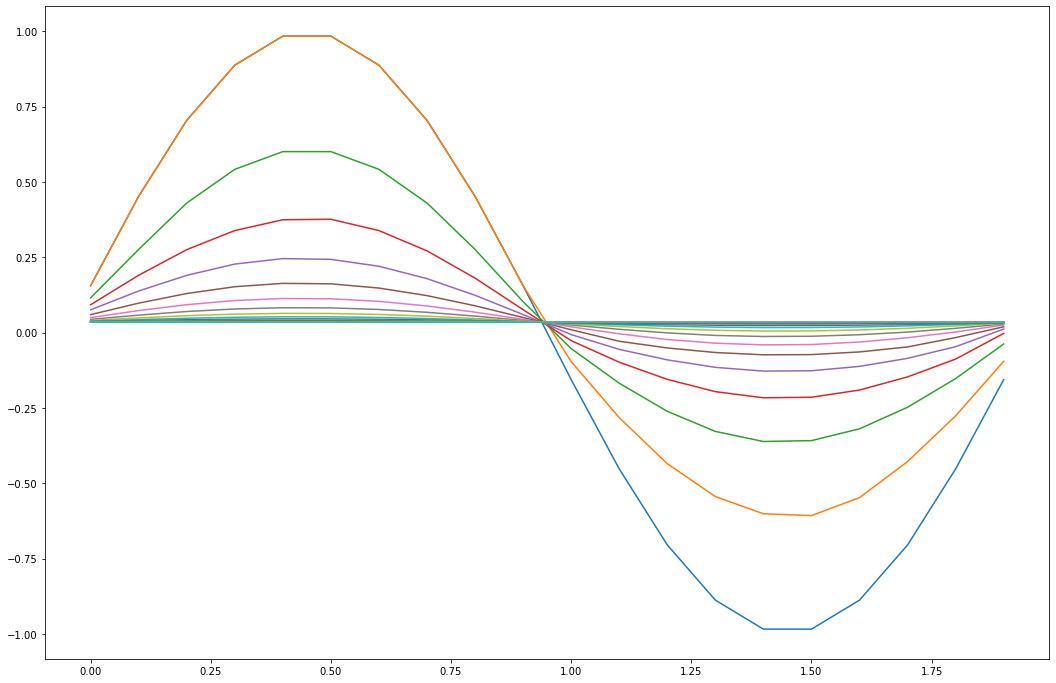

In [29]:
prediction = load_csv("10 10 control group/prediction.csv")
solution = load_csv("10 10 control group/actual solution.csv")

np_prediction = np.array(prediction)
np_solu = np.array(solution)

L1 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=1)
L2 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=2)
Li = np.absolute(np_prediction-np_solu).max()
L_data = {
    'L1': L1,
    'L2': L2,
    'Li': Li
}
save_json("10 10 control group/L.json", L_data)

x = load_csv("10 10 control group/x.csv")[0][:-1]
plt.figure(figsize = (18,12))
for i in range(len(prediction)-1):
    plt.plot(x, prediction[i])

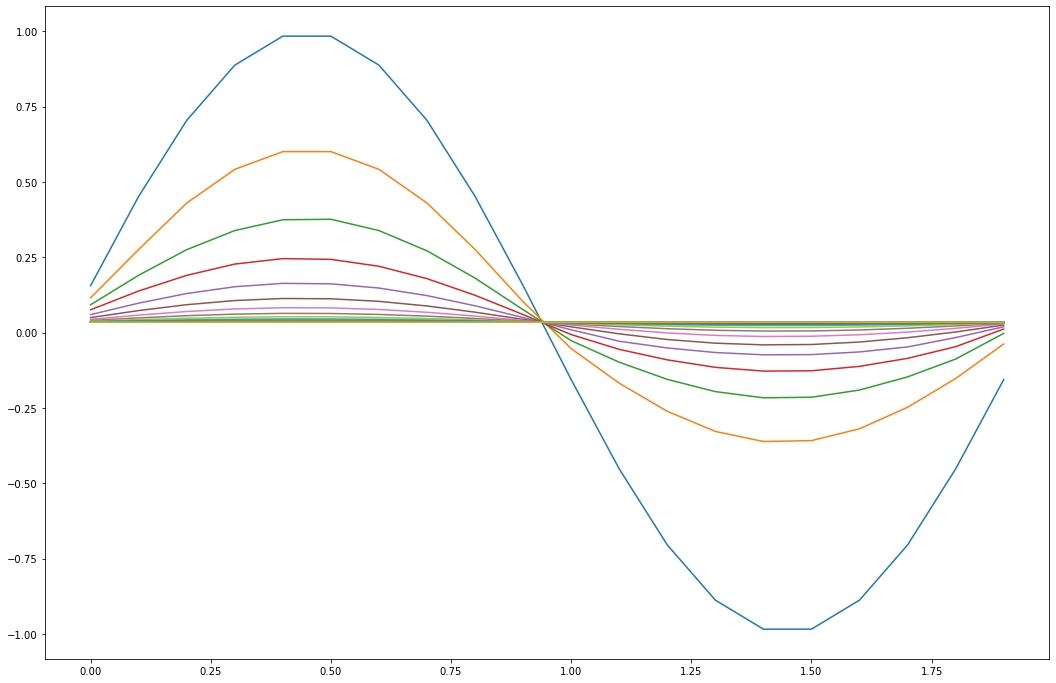

In [21]:
prediction = load_csv("10 10 control group/prediction.csv")
x = load_csv("10 10 control group/x.csv")[0][:-1]
plt.figure(figsize = (18,12))
for i in range(len(prediction)-1):
    if not i == 1:
        plt.plot(x, prediction[i])

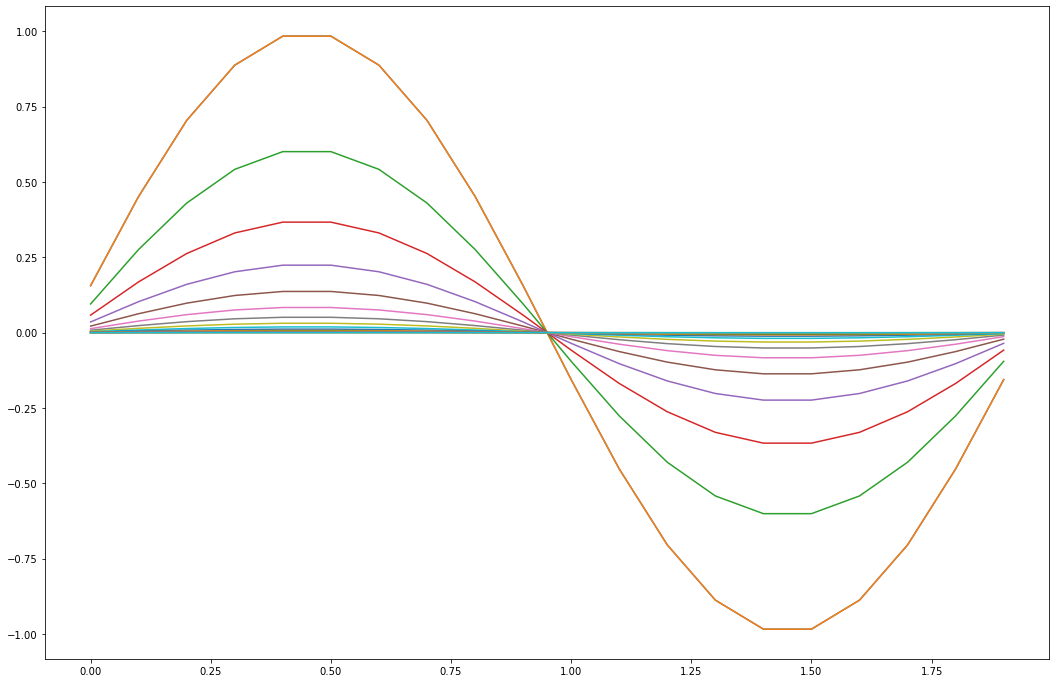

In [30]:
prediction = load_csv("10 10 control group [add layer +1]/prediction.csv")
solution = load_csv("10 10 control group [add layer +1]/actual solution.csv")

np_prediction = np.array(prediction)
np_solu = np.array(solution)

L1 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=1)
L2 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=2)
Li = np.absolute(np_prediction-np_solu).max()
L_data = {
    'L1': L1,
    'L2': L2,
    'Li': Li
}
save_json("10 10 control group [add layer +1]/L.json", L_data)

x = load_csv("10 10 control group [add layer +1]/x.csv")[0][:-1]
plt.figure(figsize = (18,12))
for i in range(len(prediction)-1):
    plt.plot(x, prediction[i])

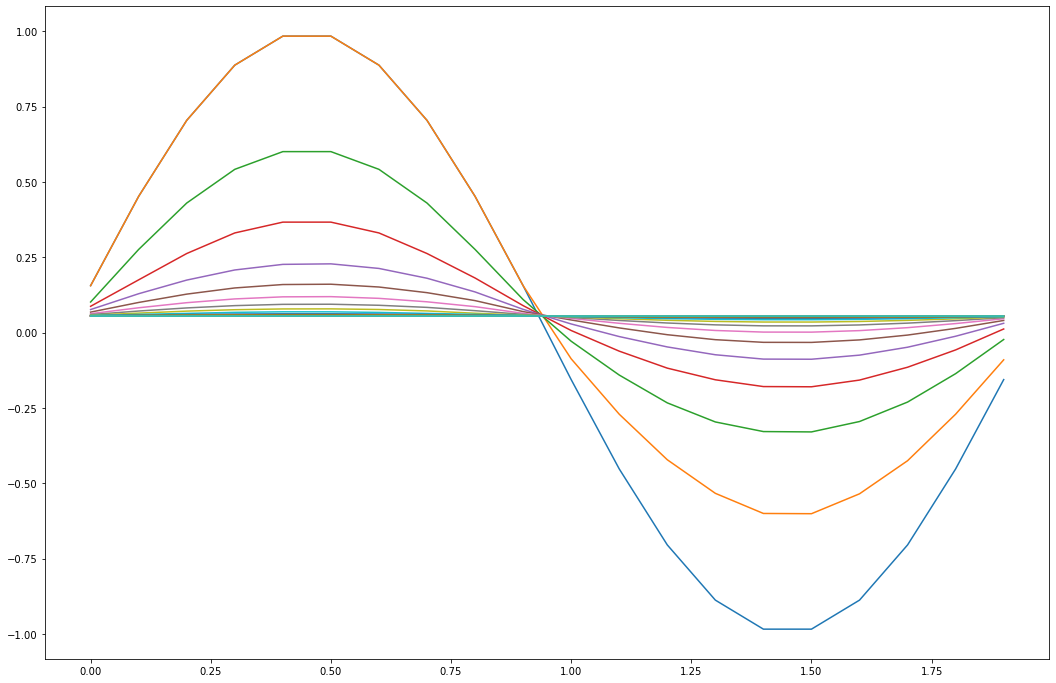

In [31]:
prediction = load_csv("10 10 control group [add layer +2]/prediction.csv")
solution = load_csv("10 10 control group [add layer +2]/actual solution.csv")

np_prediction = np.array(prediction)
np_solu = np.array(solution)

L1 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=1)
L2 = (1/20) * np.linalg.norm(np_prediction-np_solu, ord=2)
Li = np.absolute(np_prediction-np_solu).max()
L_data = {
    'L1': L1,
    'L2': L2,
    'Li': Li
}
save_json("10 10 control group [add layer +2]/L.json", L_data)

x = load_csv("10 10 control group [add layer +2]/x.csv")[0][:-1]
plt.figure(figsize = (18,12))
for i in range(len(prediction)-1):
    plt.plot(x, prediction[i])